In [30]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [42]:
from nltk.stem.porter import *
from wordcloud import WordCloud

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
print("Training Data set")
train_data.head(5)

Training Data set


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
print("Testing Data Set")
test_data.head(5)

Testing Data Set


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [9]:
print("Traning Data Set info:")
print(train_data.info())

Traning Data Set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [10]:
print("Testing Data Set info:")
print(test_data.info())

Testing Data Set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


In [11]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

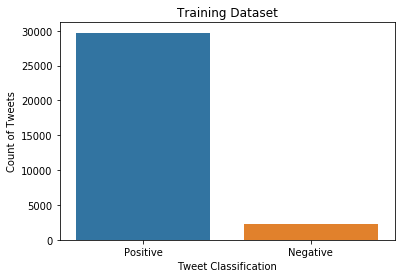

In [21]:
positive = train_data['label'].value_counts()[0]
negative = train_data['label'].value_counts()[1]
sns.barplot(['Positive','Negative'],[positive,negative])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Training Dataset')
plt.show()

In [23]:
print("Combining Dataset")
combined_data = train_data.append(test_data, ignore_index=True)

Combining Dataset


In [24]:
print("Combined Data Set info:")
print(combined_data.info())
combined_data.tail()

Combined Data Set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [26]:
def pattern_removal(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
        
    return input_text 

# remove twitter handles (@user)
combined_data['cleant_tweet'] = np.vectorize(pattern_removal)(combined_data['tweet'], "@[\w]*")
combined_data.head()

,id,label,tweet,cleant_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [28]:
combined_data['cleant_tweet'] = combined_data['cleant_tweet'].str.replace("[^a-zA-Z#]", " ")
combined_data.head()

,id,label,tweet,cleant_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [33]:
combined_data['cleant_tweet'] = combined_data['cleant_tweet'].str.replace(r'\b(\w{1,2})\b', '')
combined_data.head()

,id,label,tweet,cleant_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish d...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with all the time ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [35]:
tokenized_tweet = combined_data['cleant_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, and, selfish, dr...
1    [thanks, for, #lyft, credit, can, use, cause, ...
2                              [bihday, your, majesty]
3           [#model, love, take, with, all, the, time]
4              [factsguide, society, now, #motivation]
Name: cleant_tweet, dtype: object

In [36]:
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #lyft, credit, can, use, caus, th...
2                              [bihday, your, majesti]
3           [#model, love, take, with, all, the, time]
4                    [factsguid, societi, now, #motiv]
Name: cleant_tweet, dtype: object

In [37]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined_data['cleant_tweet'] = tokenized_tweet
combined_data.head()

,id,label,tweet,cleant_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can use caus they don o...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with all the time
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv


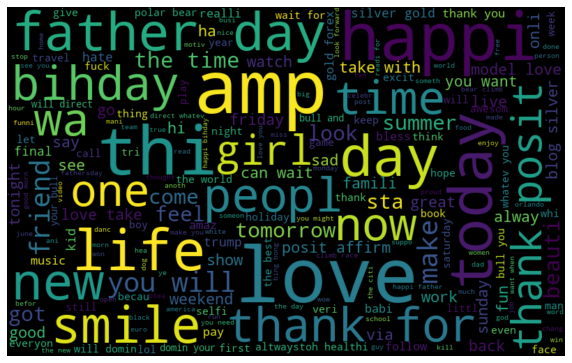

In [43]:
doc_words = ' '.join([text for text in combined_data['cleant_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(doc_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

WordCloud - Positive words


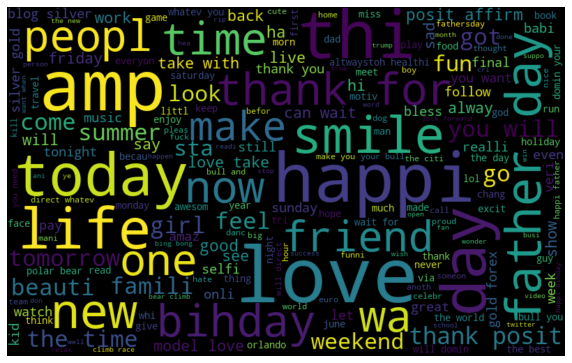

In [44]:
print("WordCloud - Positive words")
pos_words =' '.join([text for text in combined_data['cleant_tweet'][combined_data['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

WordCloud -Negative words


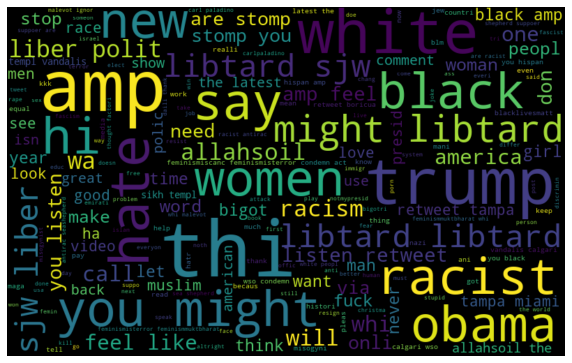

In [45]:
print("WordCloud -Negative words")
neg_words =' '.join([text for text in combined_data['cleant_tweet'][combined_data['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
print("Collecting Hash tag")
def extract_hashtag(inp):
    hashtags = []
    # Loop over the words in the tweet
    for i in inp:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [47]:
pos_ht = extract_hashtag(combined_data['cleant_tweet'][combined_data['label'] == 0])
pos_ht = sum(pos_ht,[])

neg_ht = extract_hashtag(combined_data['cleant_tweet'][combined_data['label'] == 1])
neg_ht = sum(neg_ht,[])

Plot for positive hashtag tweets


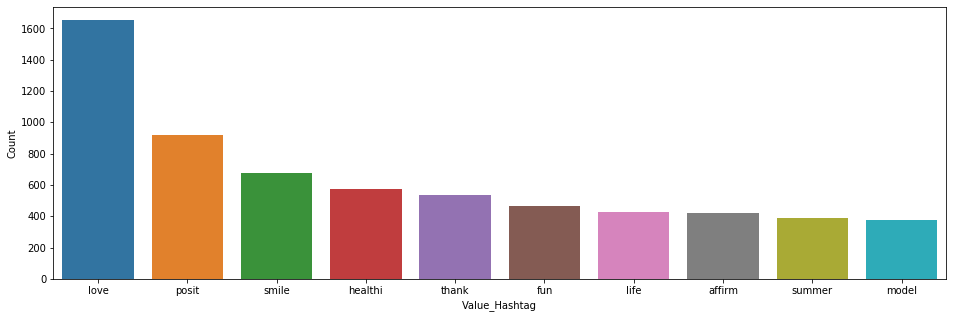

In [51]:
print("Plot for positive hashtag tweets")
a = nltk.FreqDist(pos_ht) 
d = pd.DataFrame({'Value_Hashtag': list(a.keys()),
                  'Count': list(a.values())})
   
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Value_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Plot for negative hashtag tweets


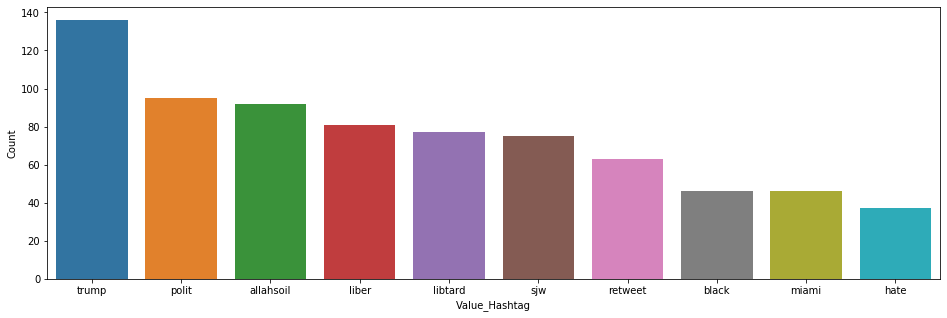

In [54]:
print("Plot for negative hashtag tweets")
b = nltk.FreqDist(neg_ht)
e = pd.DataFrame({'Value_Hashtag': list(b.keys()),
                  'Count': list(b.values())})
   
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Value_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [55]:
print("Bag of Words feature")
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined_data['cleant_tweet'])


Bag of Words feature


In [56]:
print("TF-ID feature")
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_data['cleant_tweet'])


TF-ID feature


In [72]:
print("Bag of word feature Model")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962]
train_bow.todense()
#test_bow = bow[31962:,:]

xtrain, xvalid, ytrain, yvalid = train_test_split(train_bow, train_data['label'], random_state=42, test_size=0.3)

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain) 

prediction = logreg.predict_proba(xvalid) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

from sklearn import metrics
print(metrics.classification_report(yvalid,prediction_int))


Bag of word feature Model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.63      0.50      0.55       684

    accuracy                           0.94      9589
   macro avg       0.79      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



In [68]:
'''
test_pred = logreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int
submission = test_data[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)
'''

In [76]:
print("TFid feature Model")
#train_tfidf = tfidf[:31962]
#test_tfidf = tfidf[31962:,:]
train_tfidf_matrix = tfidf[:31962]
train_tfidf_matrix.todense()

x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train_data['label'],test_size=0.3,random_state=42)
logreg.fit(x_train_tfidf, y_train_tfidf)

prediction = logreg.predict_proba(x_valid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
print(metrics.classification_report(y_valid_tfidf,prediction_int))

TFid feature Model
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.66      0.46      0.54       684

    accuracy                           0.94      9589
   macro avg       0.81      0.72      0.76      9589
weighted avg       0.94      0.94      0.94      9589

